In [1]:
from textblob import TextBlob
import requests, math, time
import csv, pathlib
import pandas as pd
import os
import openai
import json
import seaborn as sns
import json
import sys

In [2]:
print("This program uses an ML natural language model (GPT-3) to summarize and analyze articles in the NYT\nto summarize and do sentiment analysis on a given subject, person, or location (or any other keyword) over time")
print("\nYou can input your query using natural language like this: \nSearch all articles about Michael Jackson from 1990 to his death")
print("\nSearch all articles about Enron since its IPO up to its collapse")

print("\nNote: If you want detailed and accurate answers, it is better to include the dates in the query.")

This program uses an ML natural language model (GPT-3) to summarize and analyze articles in the NYT
to summarize and do sentiment analysis on a given subject, person, or location (or any other keyword) over time

You can input your query using natural language like this: 
Search all articles about Michael Jackson from 1990 to his death

Search all articles about Enron since its IPO up to its collapse

Note: If you want detailed and accurate answers, it is better to include the dates in the query.


In [3]:
url = "https://api.nytimes.com/svc/search/v2/articlesearch.json"

In [4]:
# Open the JSON file in read mode (OpenAI)
with open("..//api_key.json", "r") as f:
    # Load the JSON data from the file
    data = json.load(f)
    # Get the API key from the JSON data
    api_key = data["api_key"]

# Set the API key
openai.api_key = api_key

In [9]:
#Open the JSON files in read mode (NYT API Key)
with open("..//nyt_key.json", "r") as f:
    # Load the JSON data from the file
    data = json.load(f)
    # Get the API key from the JSON data
    api_key = data["api_key"]

# Set the API key
nyt_key = api_key

In [42]:
query = str(input("Enter the search query: "))

Enter the search query: Articles about Hillary Clinton from March 2016 to December 2016


In [ ]:
# Search all articles about Juan Manuel Santos from January 2016 to May 2016

In [43]:
#turning the response from natural language to objects that are readable by the NYT API
response_keyword = openai.Completion.create(
  model="text-davinci-003",
  prompt="Find the main keyword (a name, a location, etc) from this query and nothing else: " + query,
  temperature=0.7,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

keyword = response_keyword.choices[0].text

def remove_leading_trailing_spaces(obj):
    # Use the strip() method to remove leading and trailing spaces
    return obj.strip()

keyword = remove_leading_trailing_spaces(keyword)

response_date = openai.Completion.create(
  model="text-davinci-003",
  prompt="In number format, and adding no extra text tell me the year, month, day (YYYYMMDD) relevant to this query (there should be two dates, beggining and end separated by a single comma). If no indication of time in query, output NA. Years start on 0101 and end 1231. If no end date, add today's date: " + query,
  temperature=0.5,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
)

dates = response_date.choices[0].text

# Split the input string into a list of dates
dates = dates.split(",")

# Assign the first date to begin_date
begin_date = dates[0]

# Assign the second date to end_date
end_date = dates[1]

# We need to remove all spaces and non-numeric characters
begin_date = ''.join([c for c in begin_date if c.isdigit()])
end_date = ''.join([c for c in end_date if c.isdigit()])

In [44]:
# Adding + signs for entries with multiple words
def format_keyword(keyword):
    # Split the keyword into a list of words
    words = keyword.split()
    
    # Join the words with a + separator
    formatted_keyword = "+".join(words)
    
    return formatted_keyword

keyword = format_keyword(keyword)

In [10]:
#checking out outputs
print(keyword)
print(begin_date)
print(end_date)

NameError: name 'keyword' is not defined

In [46]:
# SEARCH ARTICLES FUNCTION WORKS
def search_articles(api_key, keyword, begin_date, end_date):
    # Set up the parameters for the API request
    base_url = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q={keyword}'

    # Create an empty dataframe to store the results
    df = pd.DataFrame()

    # Set the number of pages to retrieve
    num_pages = 10

    # Perform the API request for each page
    for page in range(num_pages):
        params = {
            'api-key': nyt_key,
            'q': keyword,
            'page': page,
            'begin_date': begin_date,
            'end_date': end_date
        }
        response = requests.get(base_url, params=params)
        data = response.json()

        # Add the articles to the dataframe
        for article in data['response']['docs']:
            df = df.append(article, ignore_index=True)
    
    return df

In [47]:
df = search_articles(nyt_key, keyword, begin_date, end_date)

/var/folders/px/0byz2_1560sgdfwwddmf6jn80000gn/T/ipykernel_35988/3530289751.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
/var/folders/px/0byz2_1560sgdfwwddmf6jn80000gn/T/ipykernel_35988/3530289751.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
/var/folders/px/0byz2_1560sgdfwwddmf6jn80000gn/T/ipykernel_35988/3530289751.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
/var/folders/px/0byz2_1560sgdfwwddmf6jn80000gn/T/ipykernel_35988/3530289751.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

/var/folders/px/0byz2_1560sgdfwwddmf6jn80000gn/T/ipykernel_35988/3530289751.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
/var/folders/px/0byz2_1560sgdfwwddmf6jn80000gn/T/ipykernel_35988/3530289751.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
/var/folders/px/0byz2_1560sgdfwwddmf6jn80000gn/T/ipykernel_35988/3530289751.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
/var/folders/px/0byz2_1560sgdfwwddmf6jn80000gn/T/ipykernel_35988/3530289751.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

/var/folders/px/0byz2_1560sgdfwwddmf6jn80000gn/T/ipykernel_35988/3530289751.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
/var/folders/px/0byz2_1560sgdfwwddmf6jn80000gn/T/ipykernel_35988/3530289751.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
/var/folders/px/0byz2_1560sgdfwwddmf6jn80000gn/T/ipykernel_35988/3530289751.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(article, ignore_index=True)
/var/folders/px/0byz2_1560sgdfwwddmf6jn80000gn/T/ipykernel_35988/3530289751.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [48]:
base_url = f'https://api.nytimes.com/svc/search/v2/articlesearch.json?q={keyword}'

if begin_date:
    base_url += f'&begin_date={begin_date}'
if end_date:
    base_url += f'&end_date={end_date}'
    
    
base_url

'https://api.nytimes.com/svc/search/v2/articlesearch.json?q=Hillary+Clinton&begin_date=20160301&end_date=20161231'

In [49]:
len(df)

100

<AxesSubplot:xlabel='pub_date', ylabel='sentiment'>

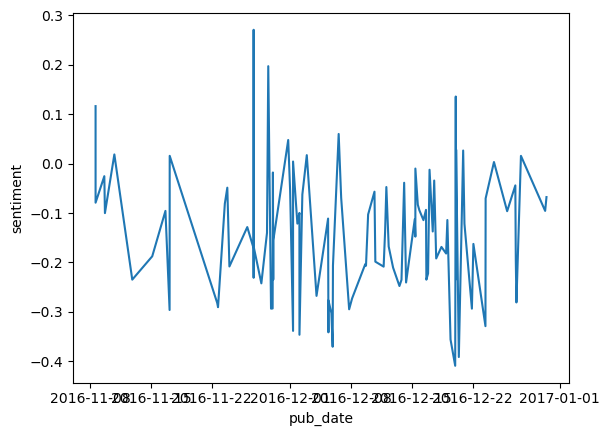

In [50]:
#Sentiment Analysis and Seaborn code

# Combine the three columns into one
df["text"] = df["abstract"].astype(str) + df["lead_paragraph"].astype(str) + df["byline"].astype(str)


# Create a new column for the sentiment scores
df["sentiment"] = df["text"].apply(lambda x: TextBlob(x).sentiment.polarity)

# Format the pub_date column as a date
df["pub_date"] = pd.to_datetime(df["pub_date"])

# Plot the sentiment scores over time
sns.lineplot(x="pub_date", y="sentiment", data=df)


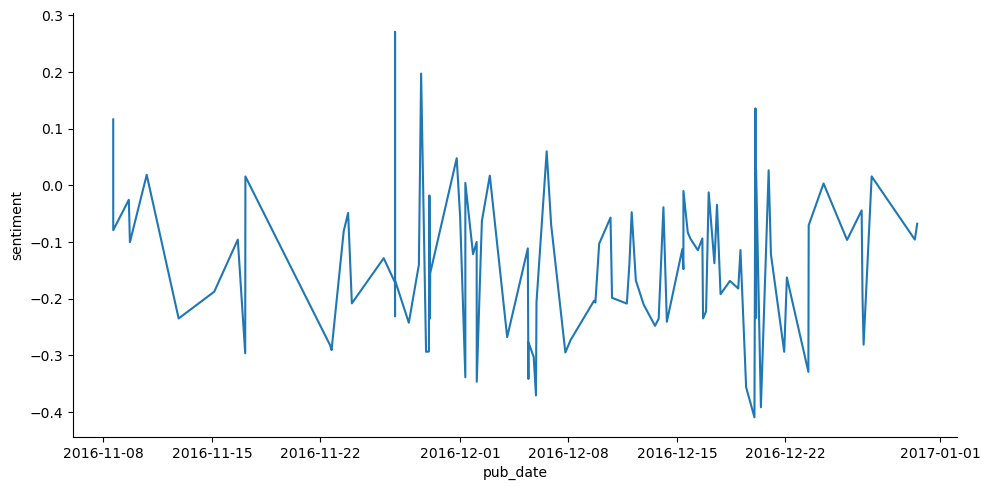

In [51]:
# better plot
sns.relplot(
    data=df, 
    x="pub_date", y="sentiment",
    kind="line",
    height=5, aspect=2 
)


In [57]:
print(df.columns)

Index(['abstract', 'web_url', 'snippet', 'lead_paragraph', 'source',
       'multimedia', 'headline', 'keywords', 'pub_date', 'document_type',
       'news_desk', 'section_name', 'subsection_name', 'byline', '_id',
       'word_count', 'uri', 'type_of_material', 'print_page', 'print_section',
       'text', 'sentiment'],
      dtype='object')


In [77]:
# Convert the pub_date column to datetime
df['pub_date'] = pd.to_datetime(df['pub_date'])

# Extract only the date part of the datetime
df['pub_date'] = pd.DatetimeIndex(df['pub_date']).date

In [84]:
# Convert the pub_date column to datetime
df['pub_date'] = pd.to_datetime(df['pub_date'])
print(df['pub_date'].dtype)

# Extract only the date part of the datetime
df['pub_date'] = pd.DatetimeIndex(df['pub_date']).date

datetime64[ns]


In [97]:
# Let's filter dates
# Convert the string to a datetime
date = pd.to_datetime('2016-11-29')

# Select articles with a pub_date on or before January 1, 2020
df_filtered = df.loc[df['pub_date'] <= date]

/Users/andy/opt/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [98]:
df_filtered

,abstract,web_url,snippet,lead_paragraph,source,multimedia,headline,keywords,pub_date,document_type,...,subsection_name,byline,_id,word_count,uri,type_of_material,print_page,print_section,text,sentiment
47,The campaign also said it would participate in...,https://www.nytimes.com/2016/11/26/us/politics...,The campaign also said it would participate in...,WASHINGTON — Nearly three weeks after Election...,The New York Times,"[{'rank': 0, 'subtype': 'articleInline', 'capt...",{'main': 'Hillary Clinton’s Team to Join Wisco...,"[{'name': 'subject', 'value': 'Presidential El...",2016-11-26,article,...,Politics,"{'original': 'By David E. Sanger', 'person': [...",nyt://article/62ee725c-7a3c-594d-a662-bc2d96fa...,969,nyt://article/62ee725c-7a3c-594d-a662-bc2d96fa...,News,22,A,The campaign also said it would participate in...,-0.171429
51,“Lock her up”? The president-elect signaled th...,https://www.nytimes.com/2016/11/22/us/politics...,“Lock her up”? The president-elect signaled th...,President-elect Donald J. Trump said on Tuesda...,The New York Times,"[{'rank': 0, 'subtype': 'articleInline', 'capt...",{'main': 'Donald Trump Drops Threat of New Hil...,"[{'name': 'subject', 'value': 'Presidential El...",2016-11-22,article,...,Politics,{'original': 'By Julie Hirschfeld Davis and Mi...,nyt://article/bbfe34ad-4fea-5886-9b53-85a13a18...,1037,nyt://article/bbfe34ad-4fea-5886-9b53-85a13a18...,News,1,A,“Lock her up”? The president-elect signaled th...,-0.282143
58,Her supporters have seized on reports by exper...,https://www.nytimes.com/2016/11/23/us/politics...,Her supporters have seized on reports by exper...,Hillary Clinton’s lead in the popular vote is ...,The New York Times,"[{'rank': 0, 'subtype': 'videoSmall', 'caption...",{'main': 'Hillary Clinton Supporters Call for ...,"[{'name': 'subject', 'value': 'Presidential El...",2016-11-24,article,...,Politics,{'original': 'By Trip Gabriel and David E. San...,nyt://article/5e0abf5d-a063-5eed-aa5d-5a10697b...,1342,nyt://article/5e0abf5d-a063-5eed-aa5d-5a10697b...,News,20,A,Her supporters have seized on reports by exper...,-0.208333
65,The Democratic nominee’s losing campaign picks...,https://www.nytimes.com/2016/11/15/us/politics...,The Democratic nominee’s losing campaign picks...,Hillary Clinton has won New Hampshire’s four e...,The New York Times,"[{'rank': 0, 'subtype': 'sfSpan', 'caption': N...","{'main': 'Hillary Clinton Wins New Hampshire',...","[{'name': 'subject', 'value': 'Presidential El...",2016-11-15,article,...,Politics,"{'original': 'By Niraj Chokshi', 'person': [{'...",nyt://article/8e217706-0560-5af7-8329-77f862cb...,139,nyt://article/8e217706-0560-5af7-8329-77f862cb...,News,NaN,NaN,The Democratic nominee’s losing campaign picks...,-0.187727
66,Donald J. Trump defeated Hillary Clinton in th...,https://www.nytimes.com/2016/11/28/us/donald-t...,Donald J. Trump defeated Hillary Clinton in th...,Donald J. Trump was officially declared the wi...,The New York Times,"[{'rank': 0, 'subtype': 'videoSmall', 'caption...",{'main': 'Trump Officially Wins Michigan Amid ...,"[{'name': 'subject', 'value': 'Presidential El...",2016-11-28,article,...,NaN,"{'original': 'By Niraj Chokshi', 'person': [{'...",nyt://article/1dc87539-1e1d-5f9f-864e-8d6b2535...,170,nyt://article/1dc87539-1e1d-5f9f-864e-8d6b2535...,News,NaN,NaN,Donald J. Trump defeated Hillary Clinton in th...,-0.293333
68,"Holding back tears, Mrs. Clinton spoke at a Ch...",https://www.nytimes.com/2016/11/17/us/politics...,"Holding back tears, Mrs. Clinton spoke at a Ch...",WASHINGTON — Hillary Clinton held back tears o...,The New York Times,[],"{'main': 'Hillary Clinton, in Emotional Speech...","[{'name': 'persons', 'value': 'Clinton, Hillar...",2016-11-17,article,...,Politics,"{'original': 'By Julie Hirschfeld Davis', 'per...",nyt://article/ba207fa1-9994-598c-9873-5d459809...,707,nyt://article/ba207fa1-9994-598c-9873-5d459809...,News,18,A,"Holding back tears, Mrs. Clinton spoke at a Ch...",0.015625
71,A Washington pizzeria has been t

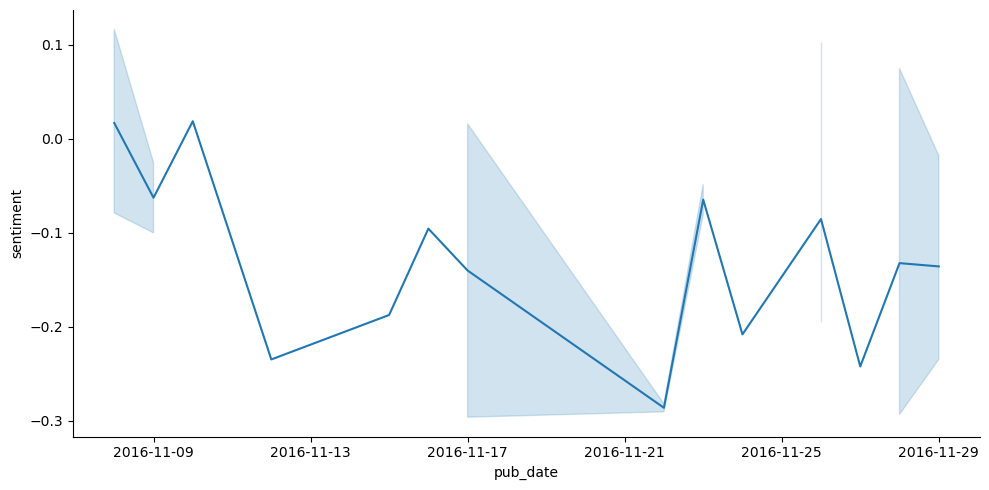

In [99]:
#filtered plot
# better plot
sns.relplot(
    data=df_filtered, 
    x="pub_date", y="sentiment",
    kind="line",
    height=5, aspect=2 
)